In [1]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score
SEED = 42

In [2]:
df=pd.read_excel('sample.xlsx')

In [3]:
df.head()

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
0,0,14,29.06593,88,174,57.5,39,96,106,20,1,0
1,0,8,26.98962,78,170,57.0,36,90,100,20,1,0
2,0,16,23.93948,75,177,59.0,39,88,104,20,1,0
3,0,15,22.12974,67,174,57.0,35,74,94,20,1,0
4,0,15,22.12974,67,174,57.0,35,74,94,20,1,0


In [4]:
df.shape

(11536, 12)

In [5]:
df

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
0,0,14,29.06593,88,174,57.5,39,96,106,20,1,0
1,0,8,26.98962,78,170,57.0,36,90,100,20,1,0
2,0,16,23.93948,75,177,59.0,39,88,104,20,1,0
3,0,15,22.12974,67,174,57.0,35,74,94,20,1,0
4,0,15,22.12974,67,174,57.0,35,74,94,20,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11531,0,16,29.48650,99,183,57.1,42,111,109,56,1,3
11532,0,11,25.07382,66,162,55.1,36,91,96,61,1,3
11533,0,6,28.66613,96,183,58.0,39,99,108,36,1,3
11534,0,15,28.73175,85,172,60.2,40,103,105,63,1,3


In [6]:
p=df.drop('status',axis=1)
q=df['status']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(p, q, test_size=.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (9228, 11)
y_train (9228,)
X_test (2308, 11)
y_test (2308,)


In [8]:
def evaluate(model, X_test , y_test,modelname):
  y_pred1=model.predict(X_test)

  accuracy     = accuracy_score(y_test, y_pred1)
  classification=classification_report(y_test, y_pred1)
  confusion    = confusion_matrix(y_test, y_pred1)
  df_model2 = pd.DataFrame({  'model'        : [modelname],
                             'accuracy'     : [accuracy],
                           'classification':[classification],

                             'timetaken'    : [time2],
                            'confusionmatrix' : [confusion]
                            
                                }) 
  return df_model2

In [11]:
%%time
time2=time.time()
print("base model")
base_model = RandomForestClassifier(random_state=0)
base_model.fit(X_train, y_train)
#base_accuracy = evaluate(base_model, X_test, y_test,modelname)
model11 = evaluate(base_model,  X_test,  y_test, 'RandomForest')
model11.timetaken[0] = time.time() - time2
print("Random Forest")
print(base_model.get_params())

#print(model11)



base model
Random Forest
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
CPU times: user 1.51 s, sys: 8.62 ms, total: 1.52 s
Wall time: 2.03 s


In [12]:
%%time
from sklearn.ensemble import ExtraTreesClassifier

time2=time.time()
print("base model")
base_model12 = ExtraTreesClassifier(random_state=0)
base_model12.fit(X_train, y_train)
model12 = evaluate(base_model12,  X_test,  y_test, 'Extra Tree')
model12.timetaken[0] = time.time() - time2
print("Extra Tree")
print(base_model12.get_params())

##print(model12)

base model
Extra Tree
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
CPU times: user 1.02 s, sys: 38.6 ms, total: 1.05 s
Wall time: 1.09 s


In [13]:
%%time
time2=time.time()
print("base model")
base_model13 = LogisticRegression(random_state=0)
base_model13.fit(X_train, y_train)
model13 = evaluate(base_model13,  X_test,  y_test, 'Logistic Regression')
model13.timetaken[0] = time.time() - time2
print("Logoistic Regression")
print(base_model13.get_params())

#print(model13)

base model
Logoistic Regression
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
CPU times: user 792 ms, sys: 558 ms, total: 1.35 s
Wall time: 734 ms


In [14]:
%%time
time2=time.time()
print("base model")
base_model14 = KNeighborsClassifier()
base_model14.fit(X_train, y_train)
model14 = evaluate(base_model14,  X_test,  y_test, 'KNN')
model14.timetaken[0] = time.time() - time2
print("KNN")
print(base_model14.get_params())
#print(model14)

base model
KNN
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
CPU times: user 218 ms, sys: 629 µs, total: 219 ms
Wall time: 227 ms


In [15]:
%%time
time2=time.time()
print("base model")
base_model15 = LinearSVC(random_state=0)
base_model15.fit(X_train, y_train)
model15 = evaluate(base_model15,  X_test,  y_test, 'LinearSVC')
model15.timetaken[0] = time.time() - time2
print("LinearSVC")
print(base_model15.get_params())
#print(model15)

base model
LinearSVC
{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 0, 'tol': 0.0001, 'verbose': 0}
CPU times: user 3.97 s, sys: 5.21 ms, total: 3.97 s
Wall time: 4.72 s


In [16]:
%%time
time2=time.time()
print("base model")
base_model16 = GaussianNB()
base_model16.fit(X_train, y_train)
model16 = evaluate(base_model16,  X_test,  y_test, 'GaussianNB')
model16.timetaken[0] = time.time() - time2
print("GaussianNB")
print(base_model16.get_params())
#print(model16)

base model
GaussianNB
{'priors': None, 'var_smoothing': 1e-09}
CPU times: user 26.4 ms, sys: 0 ns, total: 26.4 ms
Wall time: 27.7 ms


In [17]:
%%time
time2=time.time()
print("base model")
base_model17=SVC(random_state=0)
base_model17.fit(X_train, y_train)
model17 = evaluate(base_model17,  X_test,  y_test, 'SVC')
model17.timetaken[0] = time.time() - time2
print("SVC")
print(base_model17.get_params())
#print(model17)

base model
SVC
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}
CPU times: user 7.91 s, sys: 205 ms, total: 8.11 s
Wall time: 9.08 s


In [18]:
%%time
time2=time.time()
print("base model")
base_model18=DecisionTreeClassifier(random_state=0)
base_model18.fit(X_train, y_train)
model18 = evaluate(base_model18,  X_test,  y_test, 'Decision Tree')
model18.timetaken[0] = time.time() - time2
print("Decision Tree")
print(base_model18.get_params())

#print(model18)


base model
Decision Tree
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}
CPU times: user 80.8 ms, sys: 0 ns, total: 80.8 ms
Wall time: 85.6 ms


In [19]:
df_base2= pd.concat([model11,model12,model13,model14,model15,model16,model17,model18],axis = 0).reset_index()
df_base2.drop('index', axis=1, inplace=True)
df_base2

,model,accuracy,classification,timetaken,confusionmatrix
0,RandomForest,0.899047,precision recall f1-score ...,2.023247,"[[460, 8, 7, 119], [1, 579, 0, 0], [0, 0, 570,..."
1,Extra Tree,0.893414,precision recall f1-score ...,1.090327,"[[450, 4, 2, 138], [0, 580, 0, 0], [0, 0, 570,..."
2,Logistic Regression,0.524697,precision recall f1-score ...,0.731210,"[[169, 152, 148, 125], [123, 317, 105, 35], [9..."
3,KNN,0.831023,precision recall f1-score ...,0.222633,"[[333, 75, 41, 145], [0, 580, 0, 0], [0, 0, 57..."
4,LinearSVC,0.255633,precision recall f1-score ...,4.712719,"[[1, 2, 590, 1], [0, 3, 577, 0], [0, 0, 570, 0..."
5,GaussianNB,0.574090,precision recall f1-score ...,0.026424,"[[216, 188, 88, 102], [67, 454, 51, 8], [58, 1..."
6,SVC,0.548094,precision recall f1-score ...,9.082490,"[[164, 194, 126, 110], [36, 388, 124, 32], [43..."
7,Decision Tree,0.861785,precision recall f1-score ...,0.078153,"[[413, 30, 14, 137], [5, 572, 1, 2], [1, 0, 56..."


In [20]:
classifiers=[
DecisionTreeClassifier(random_state=0),
SVC(random_state=0),
LinearSVC(random_state=0),
GaussianNB(),
KNeighborsClassifier(),
LogisticRegression(random_state=0),
RandomForestClassifier(random_state=0),
ExtraTreesClassifier(random_state=0)]

In [21]:

#!pip install yellowbrick
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# For Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

# For Metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
# For Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [22]:
classes =  ["Normal", "Mild","Moderate","Severe"]
classes

['Normal', 'Mild', 'Moderate', 'Severe']

In [23]:
# for class-centric metrics
# Classification report :
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        Class_report(name,classes)

#Class Prediction Error :
def CPE_viz():    
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  

        visualizer.score(X_test, y_test)
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CPE(name,classes)
        
#Confusion matrix
def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the model
       
        visualizer.score(X_test, y_test)
         
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)
        
#ROC-AUC :
def ROC_viz():    
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
       
        visualizer.score(X_test, y_test)
         
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        ROC(name,classes)

#Precision Recall Curve :
def PRC_viz():  
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
       
        visualizer.score(X_test, y_test)
        
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        PRC(name,classes)


In [24]:
# for aggregate metrics
def classifier_metrics():    
    def metrics(model):
        
        model.fit(X_train, y_train)  
        y_pred = model.predict(X_test)
        try: 
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('cohen_kappa_score: {0:.3f}'.format(c_k_s))
        print('log_loss: {0:.3f}'.format(log_metric))
        print('zero_one_loss: {0:.3f}'.format(zero_met))
        print('hemming_loss: {0:.3f}'.format(hl))
        print('matthews_corrcoef: {0:.3f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("------------------------------------------------")

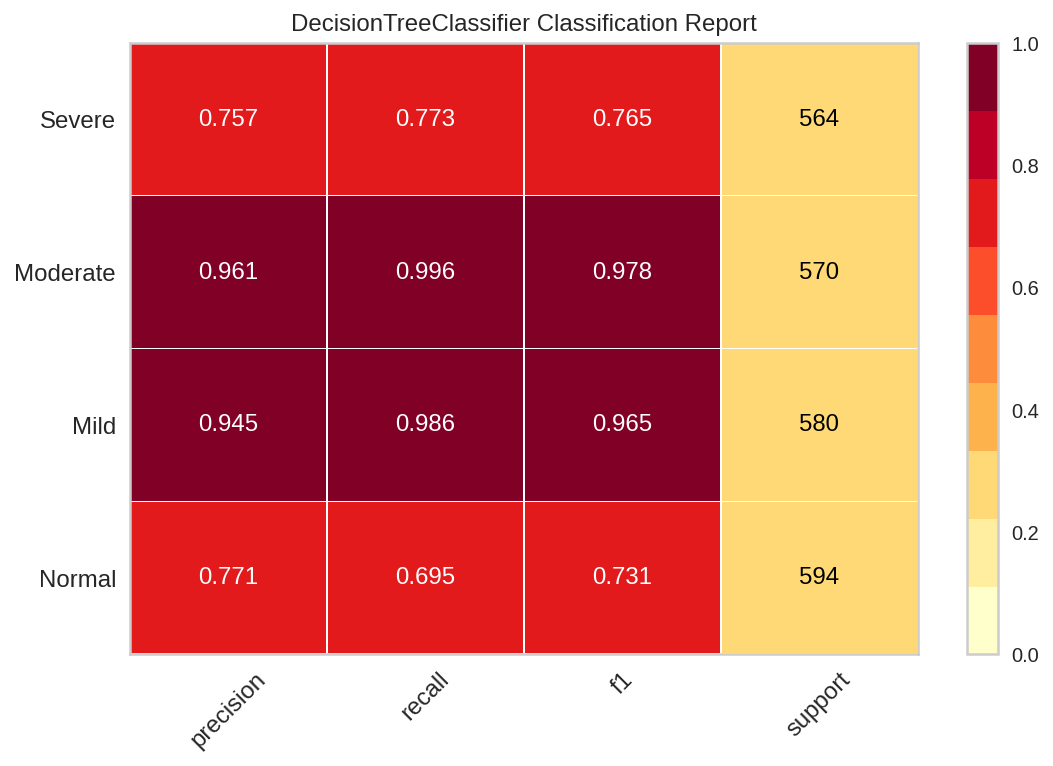

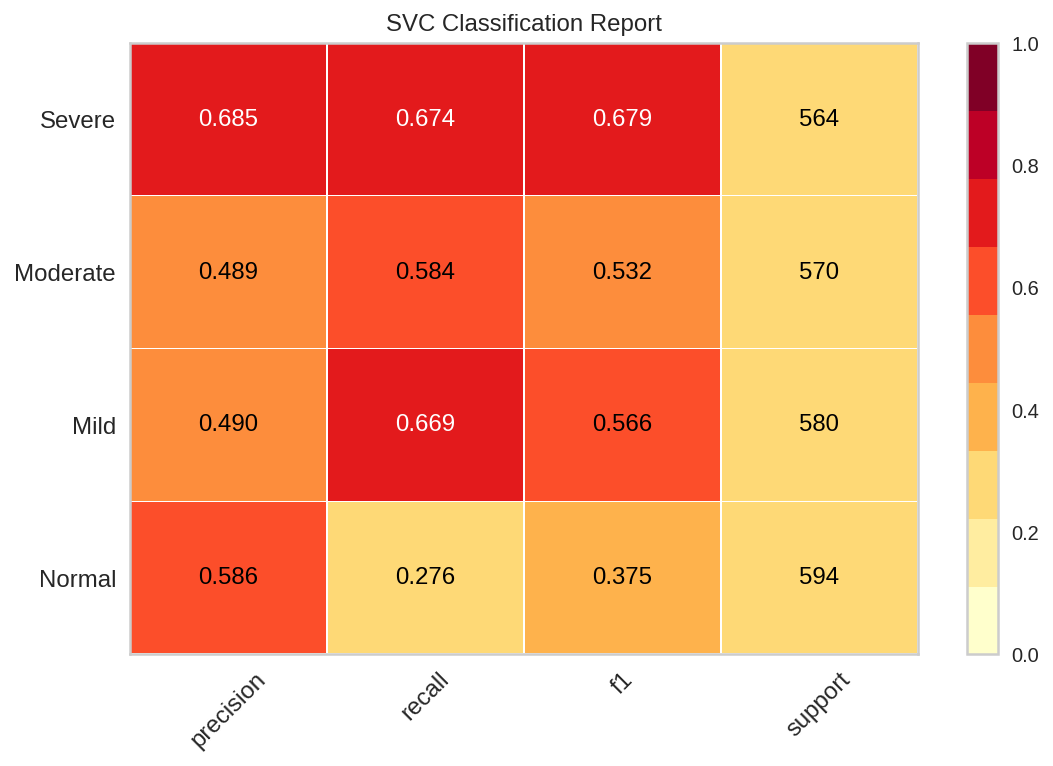

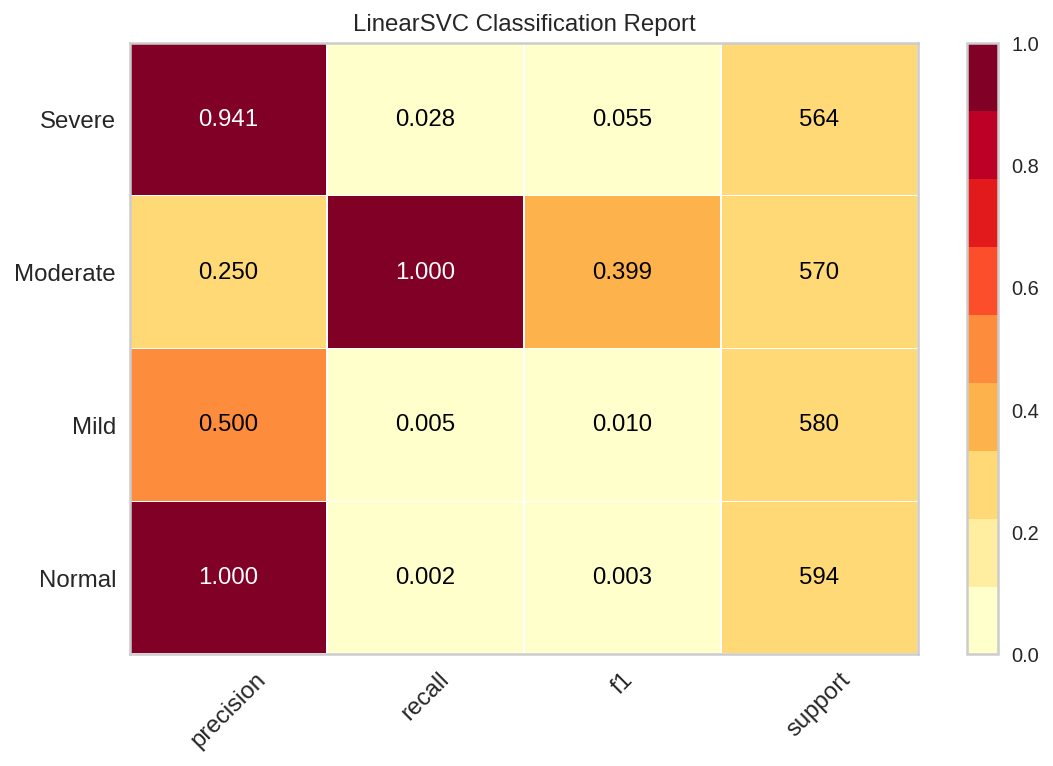

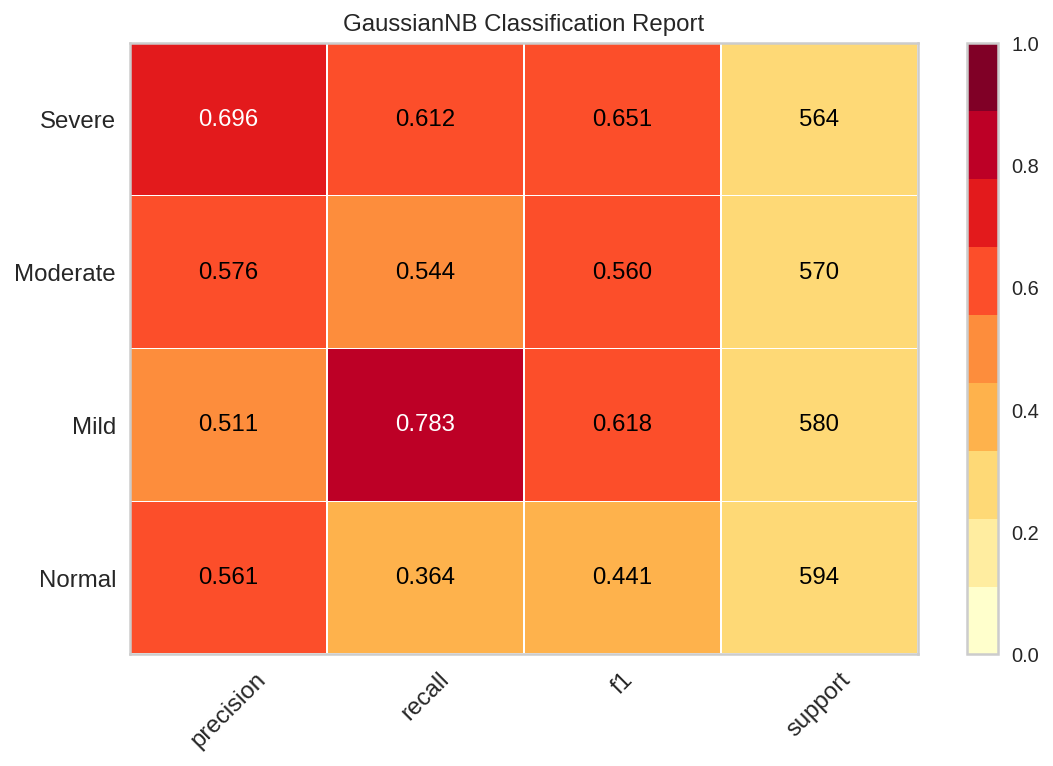

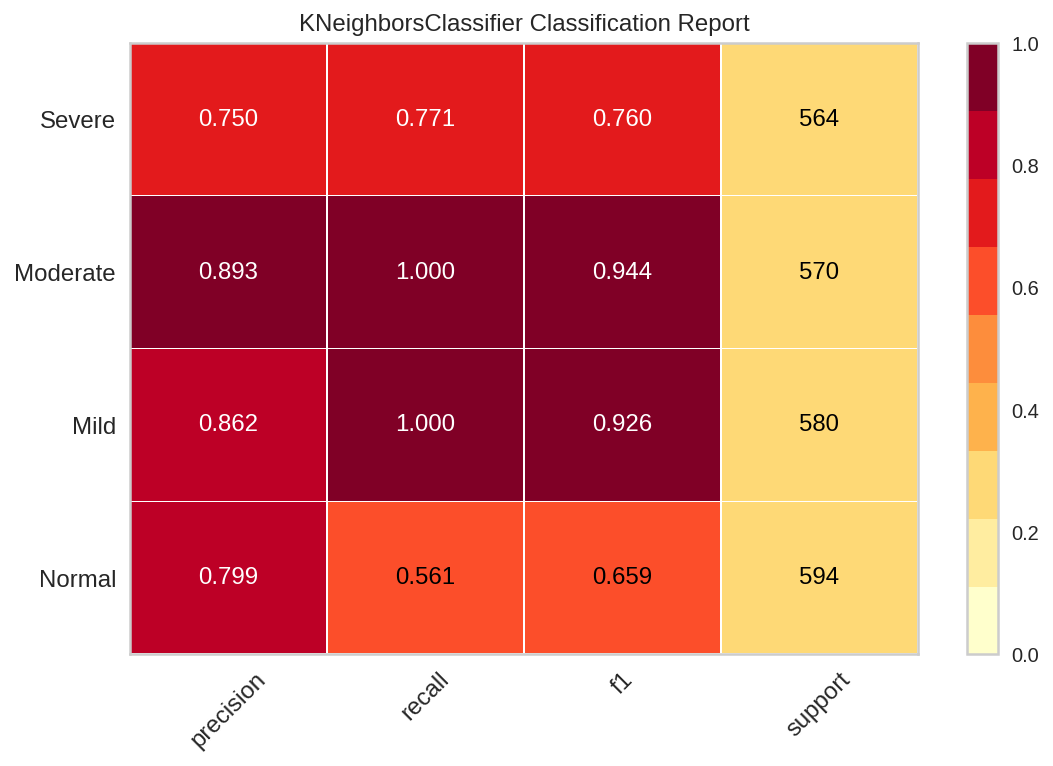

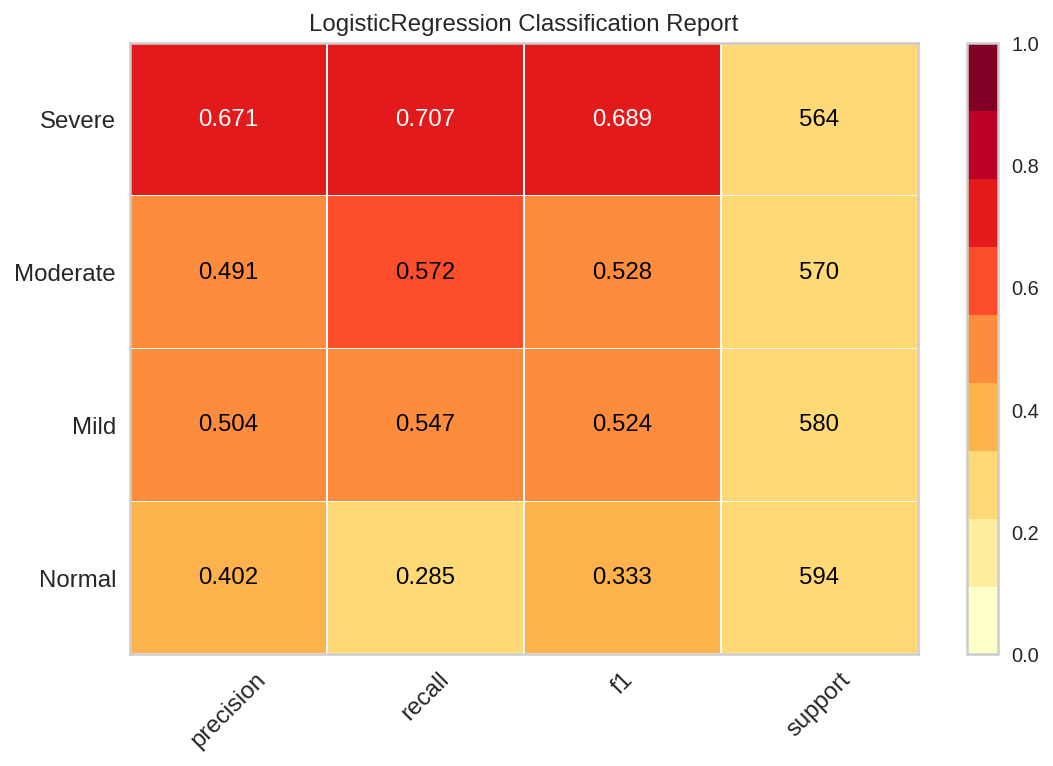

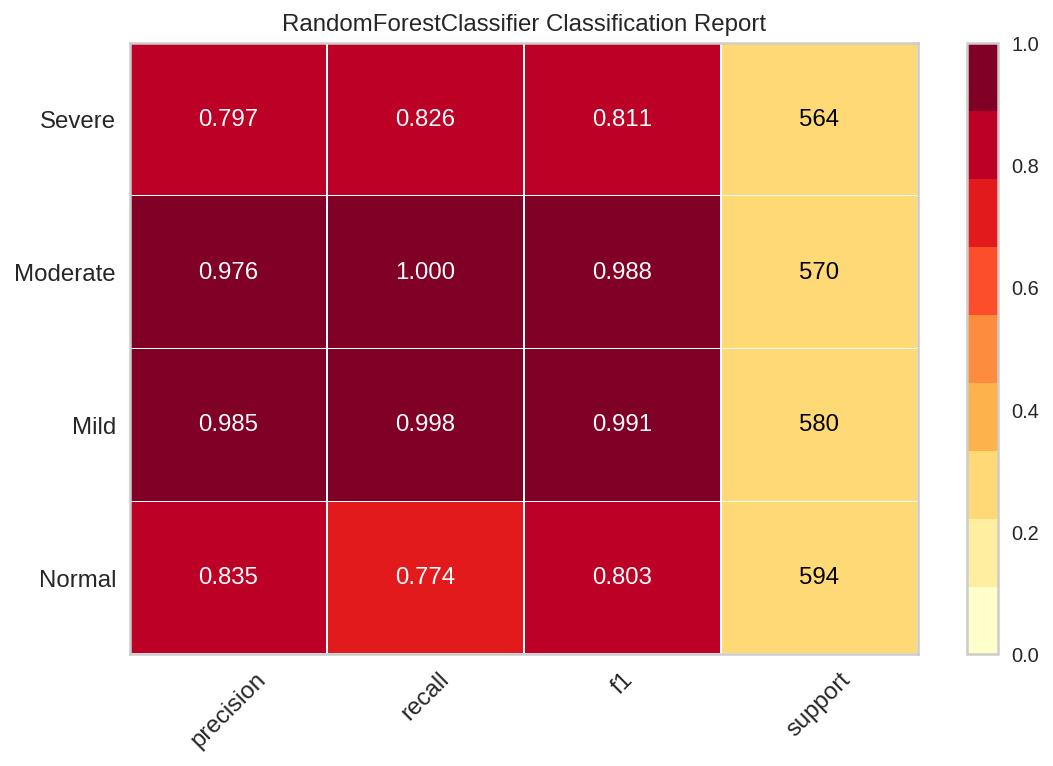

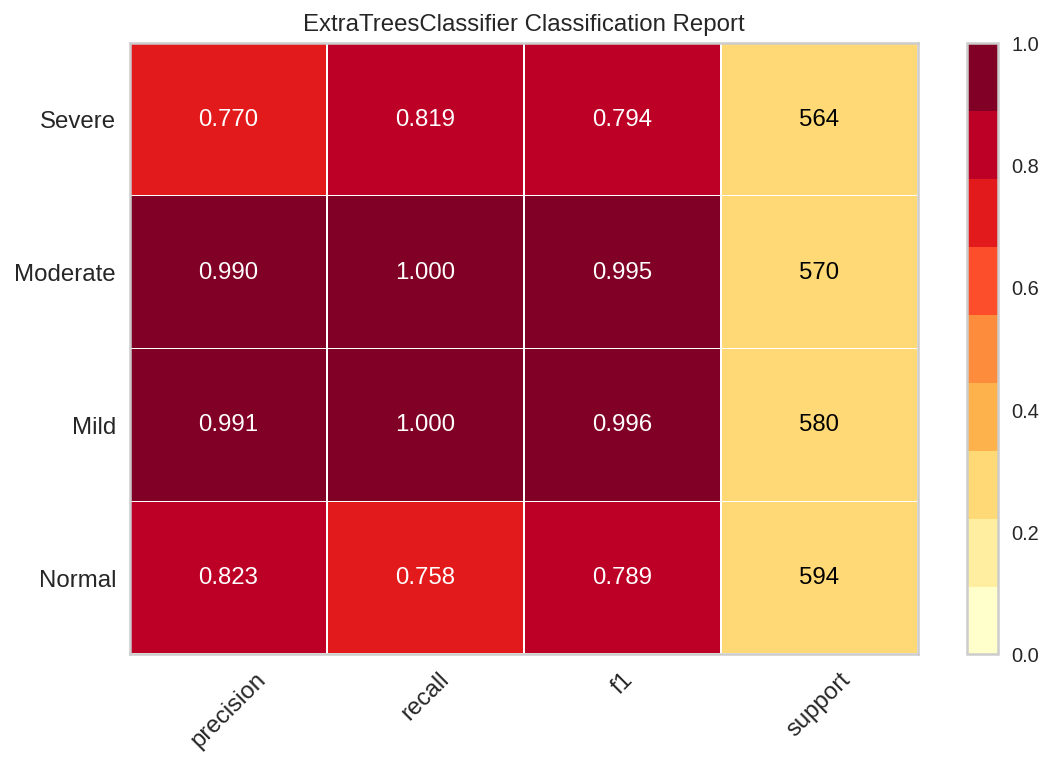

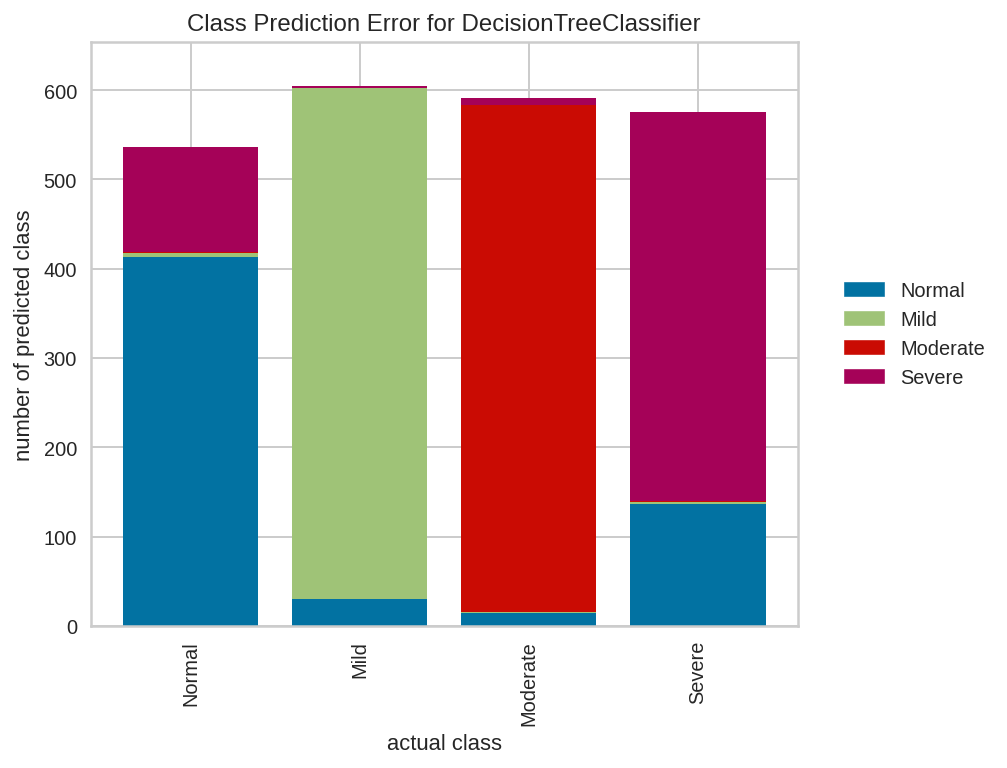

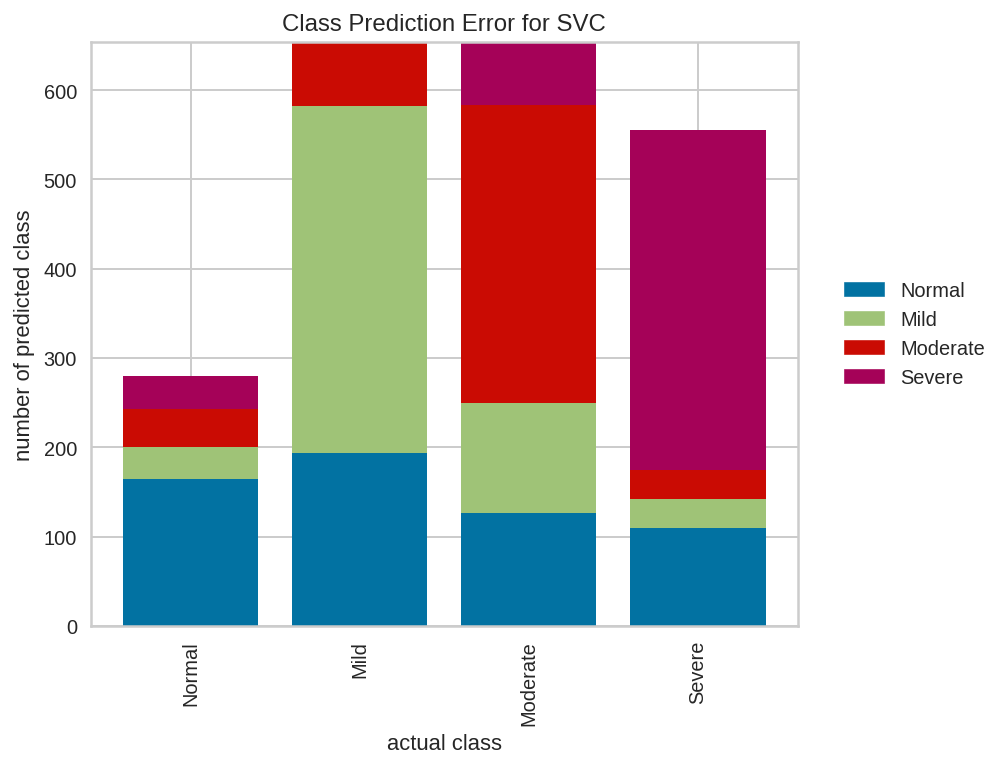

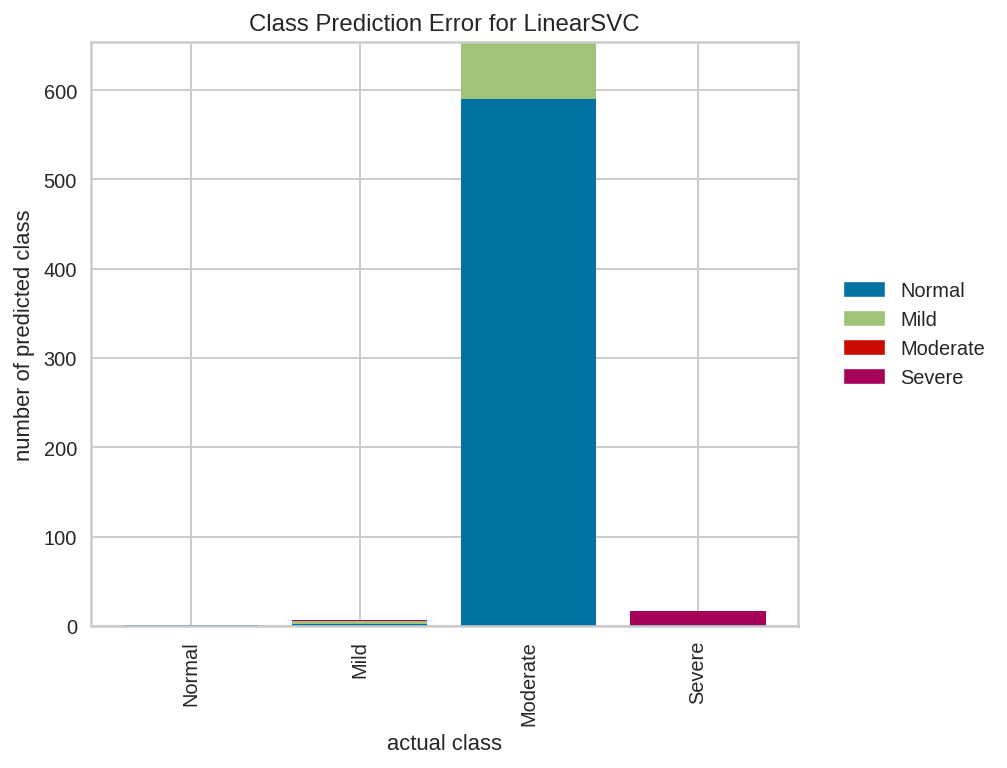

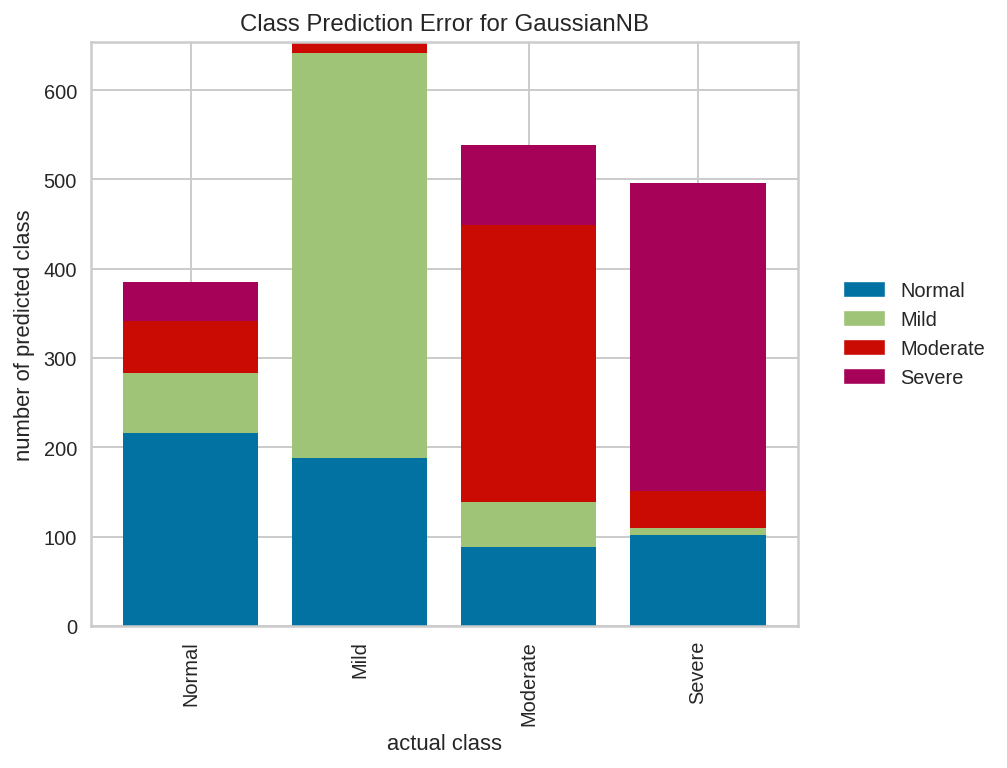

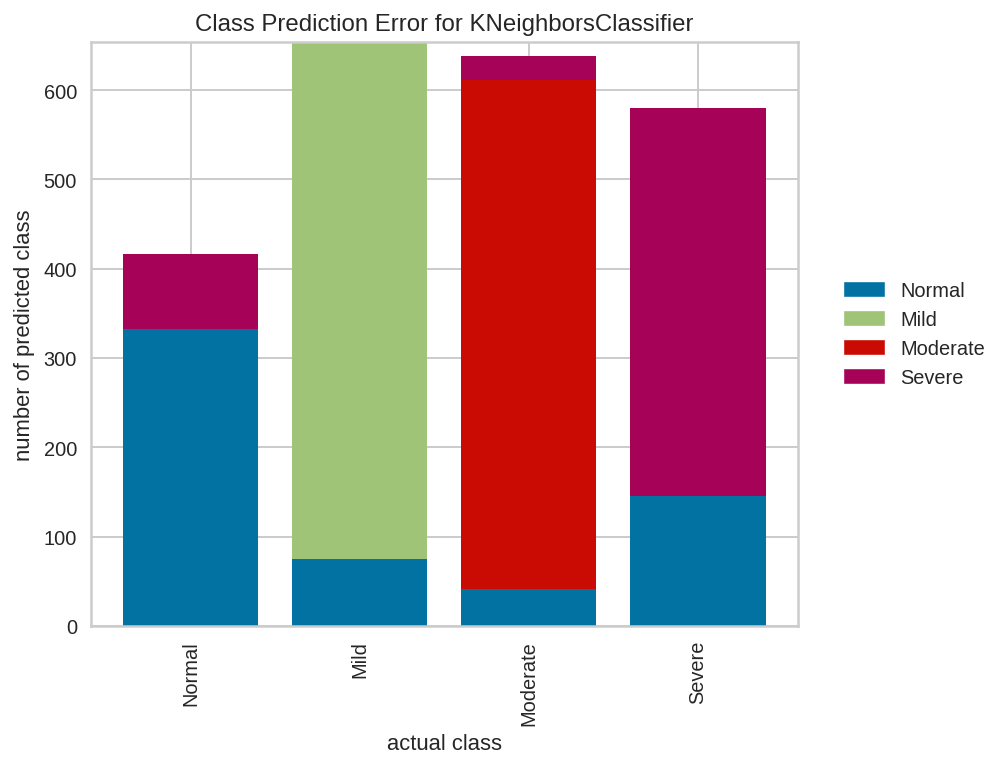

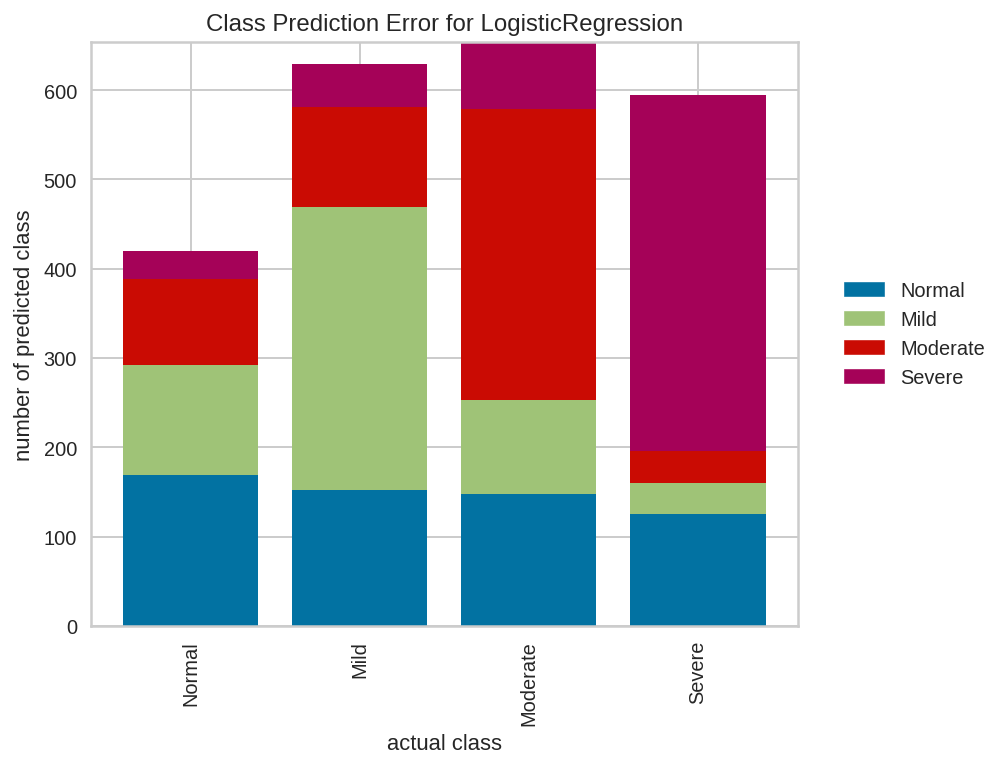

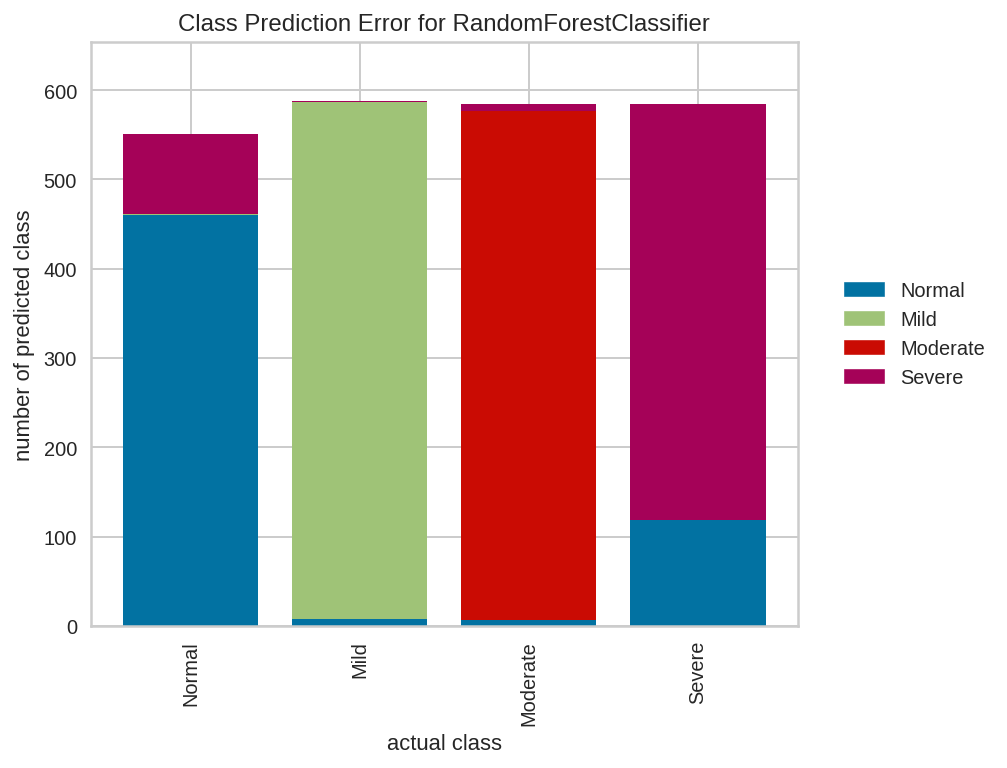

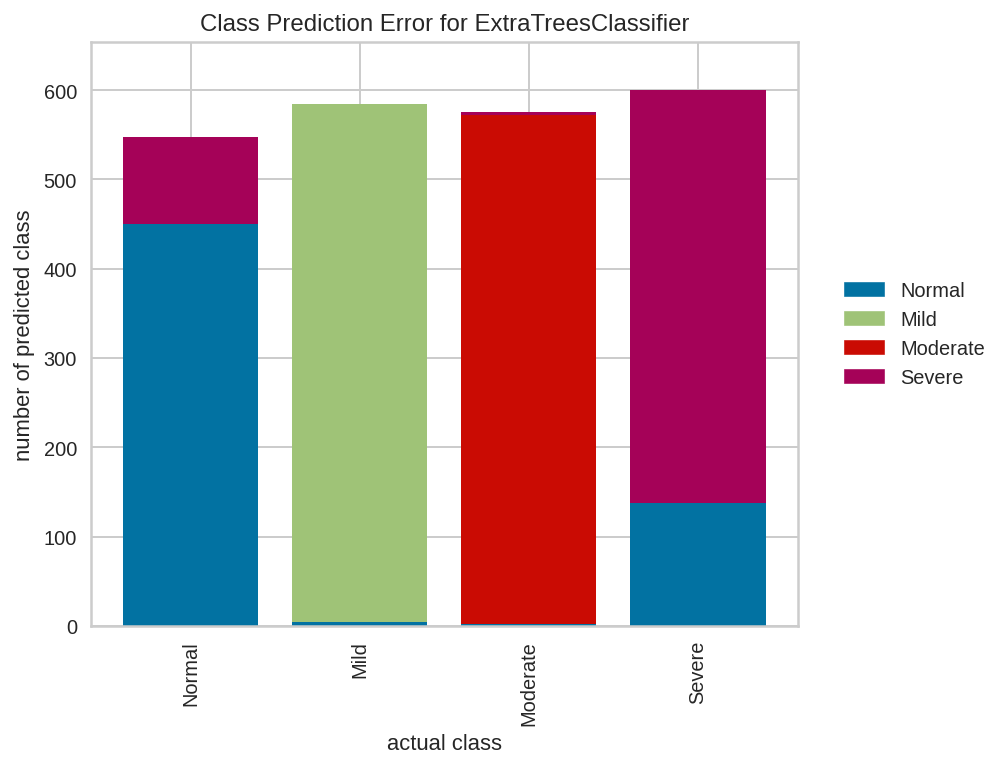

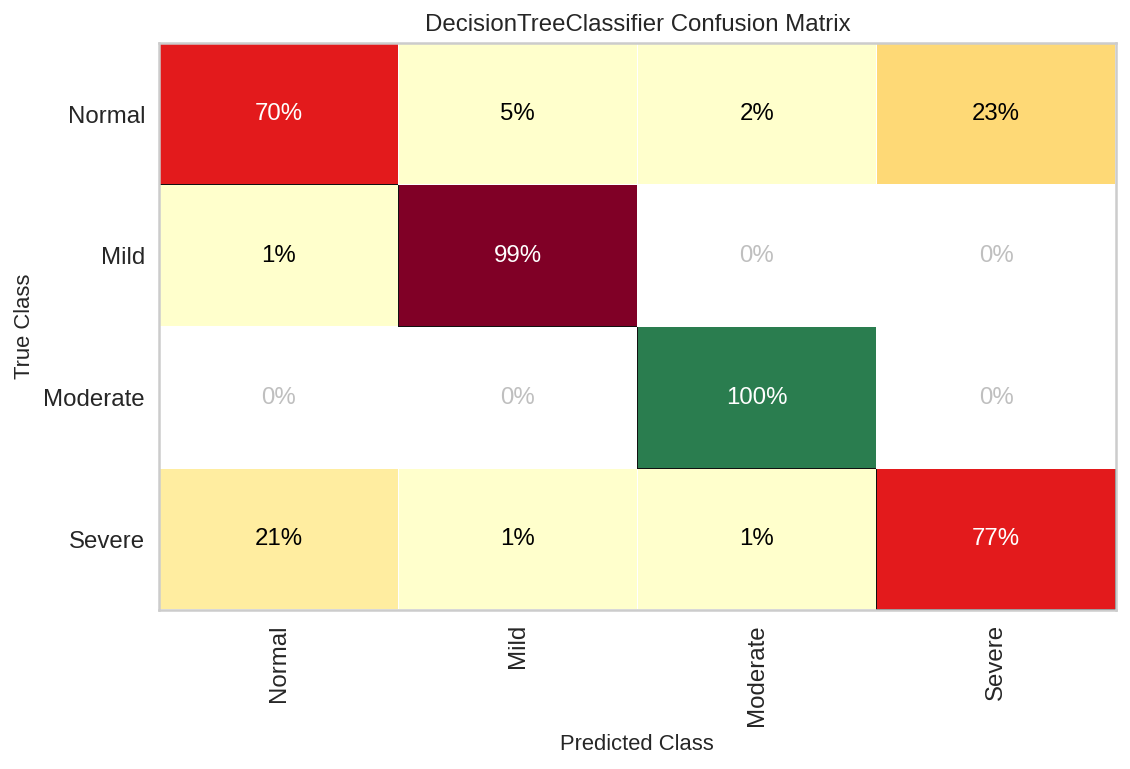

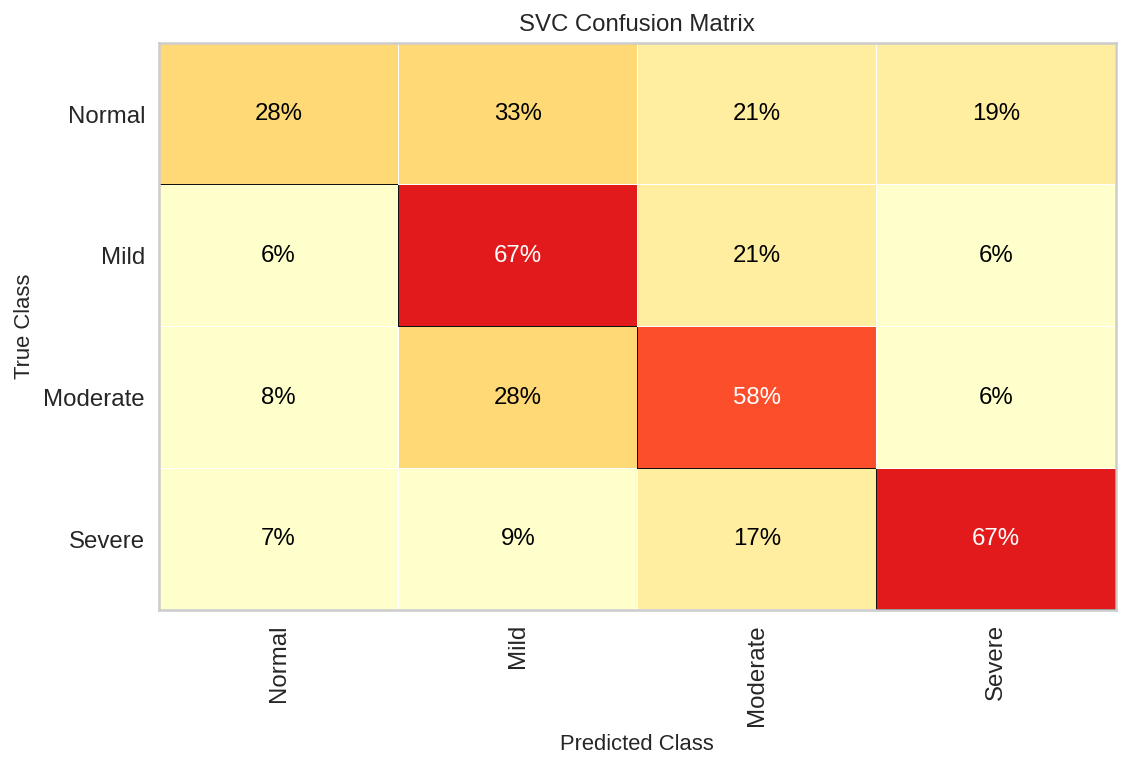

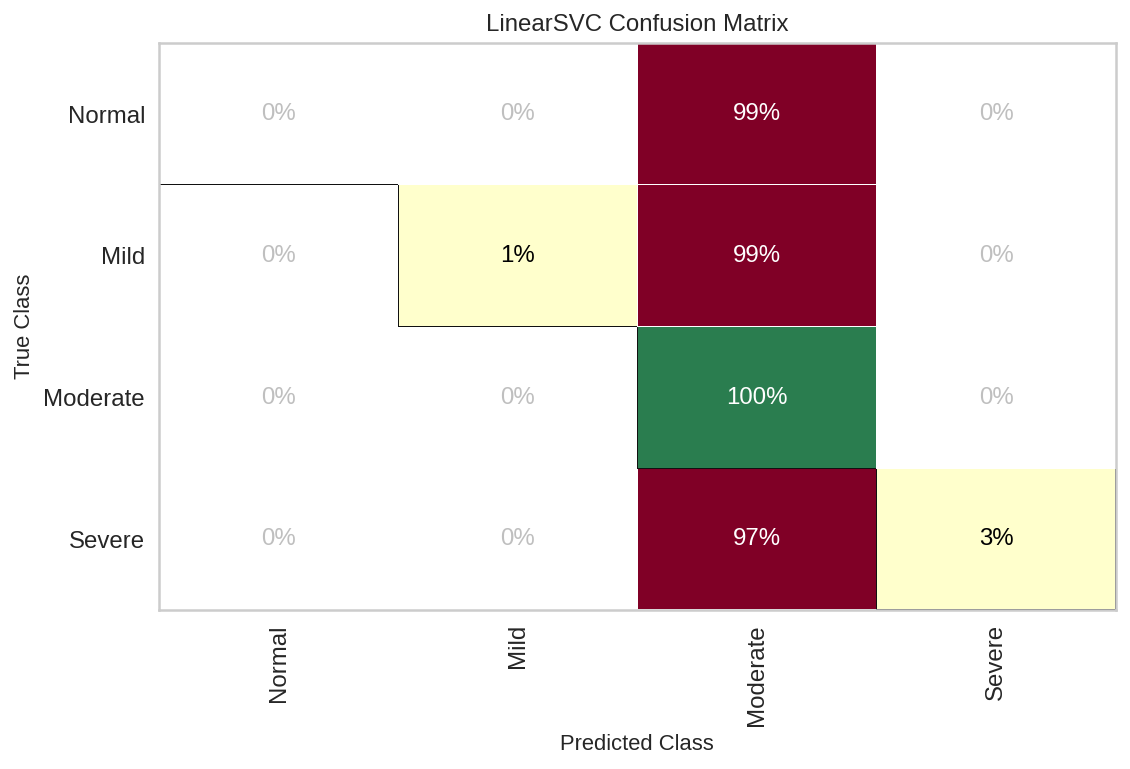

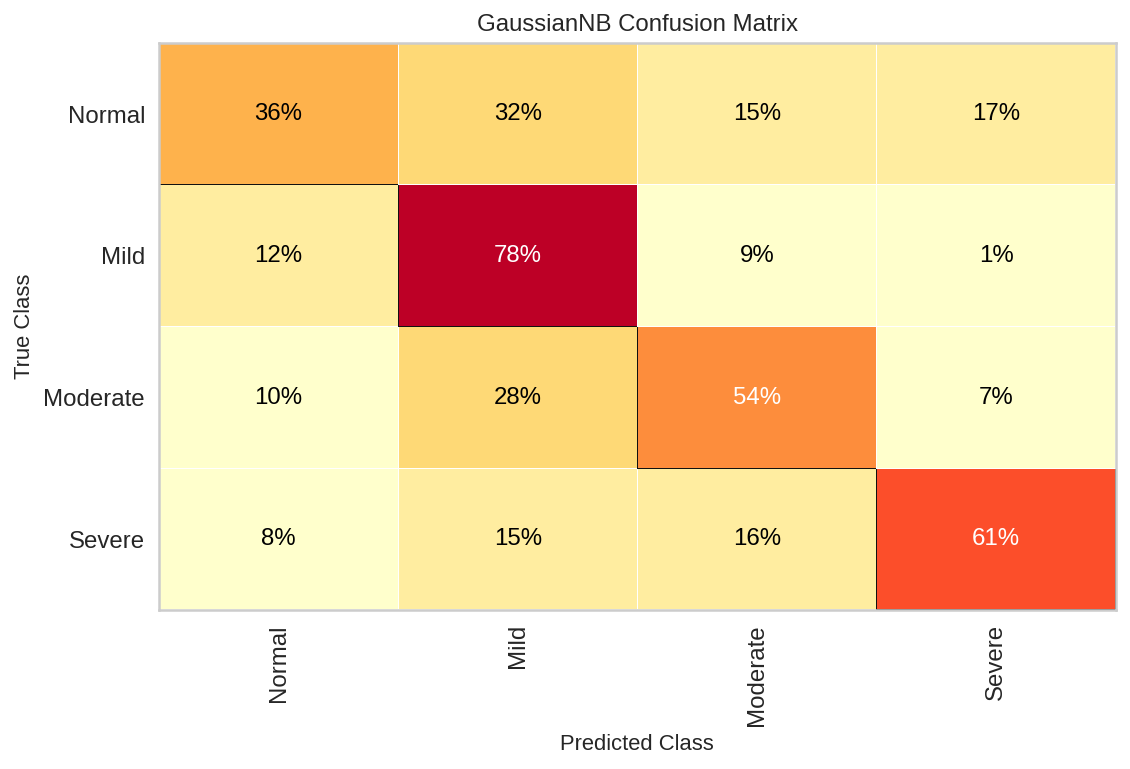

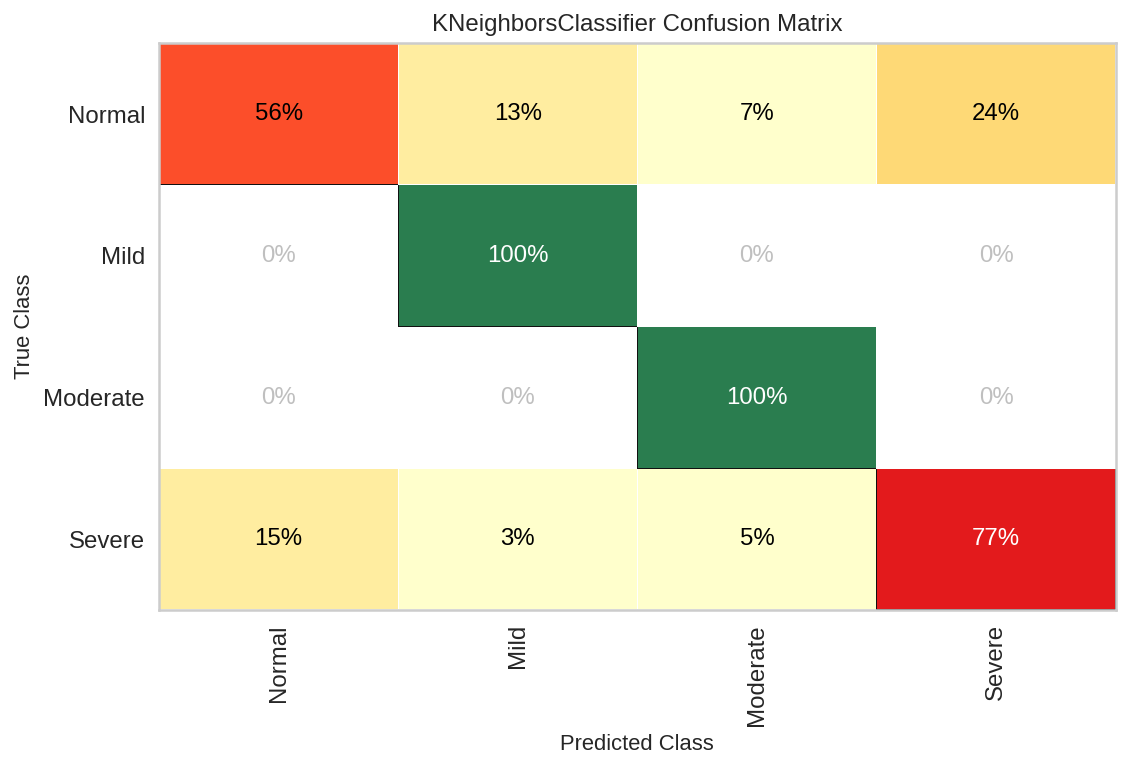

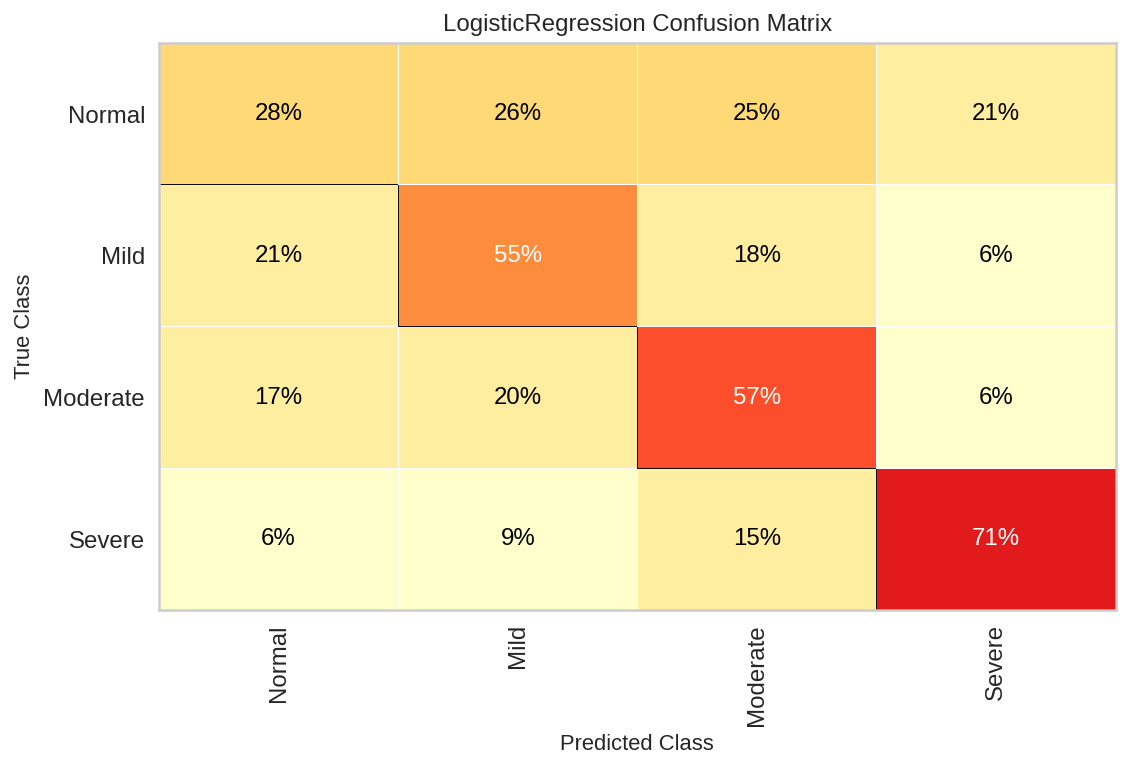

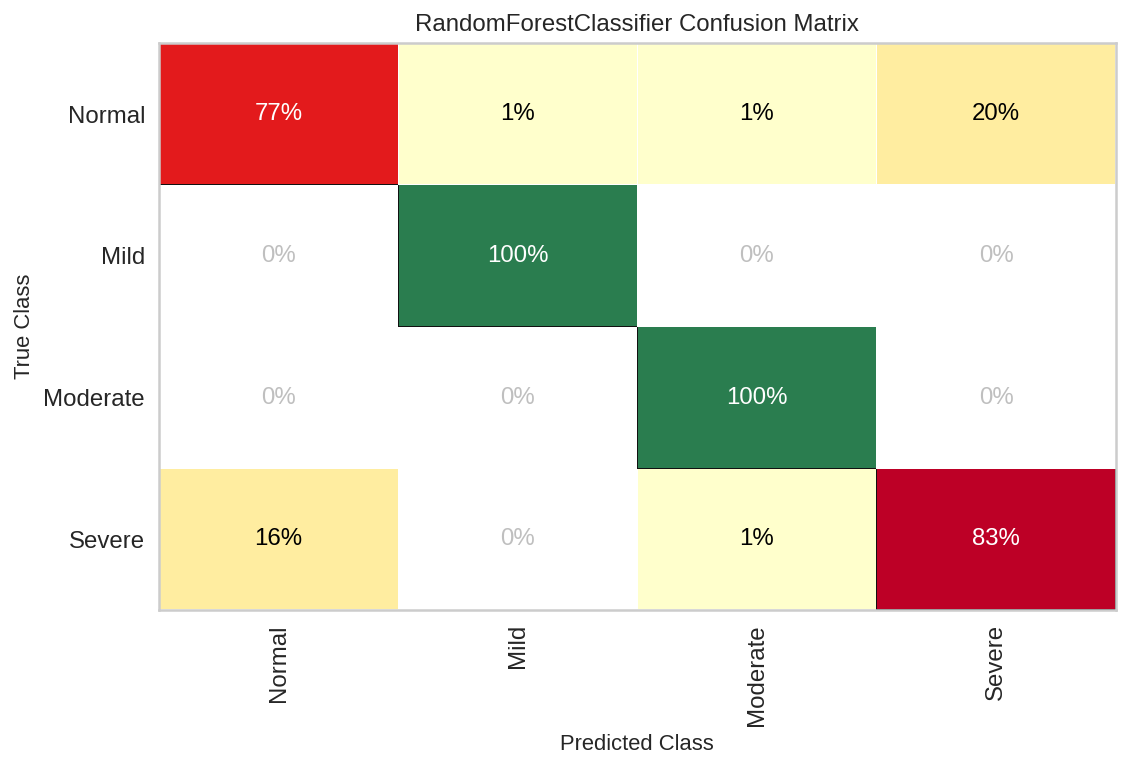

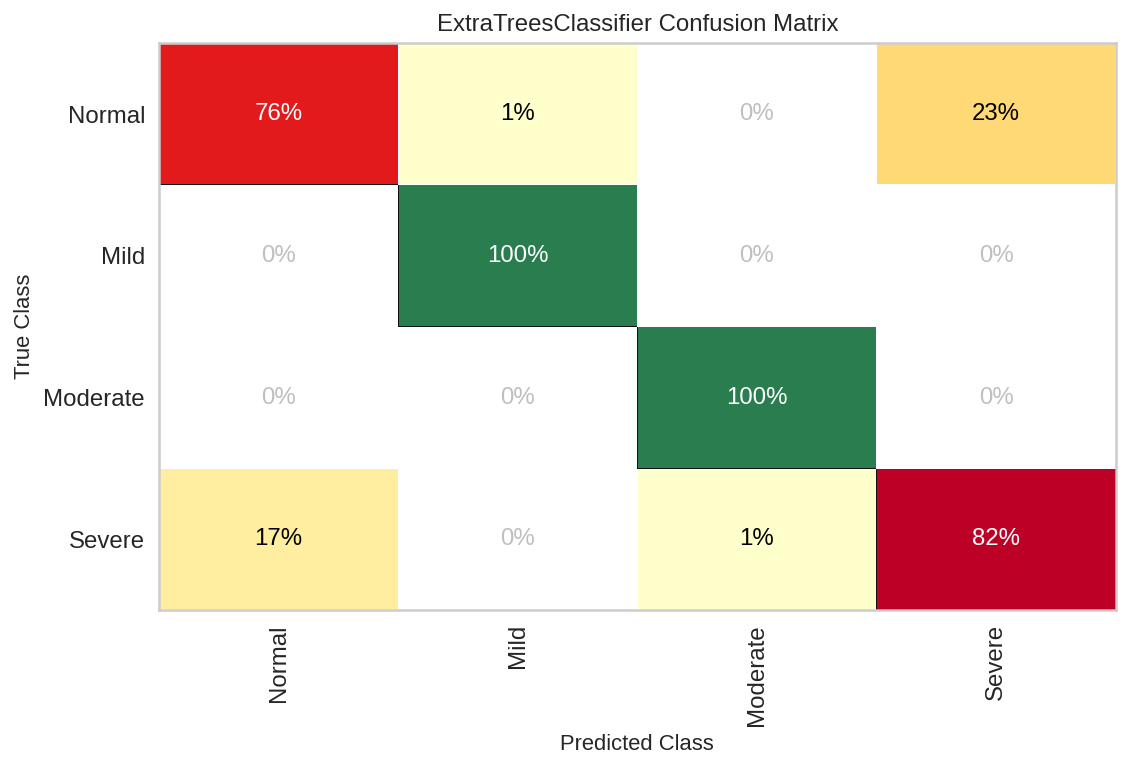

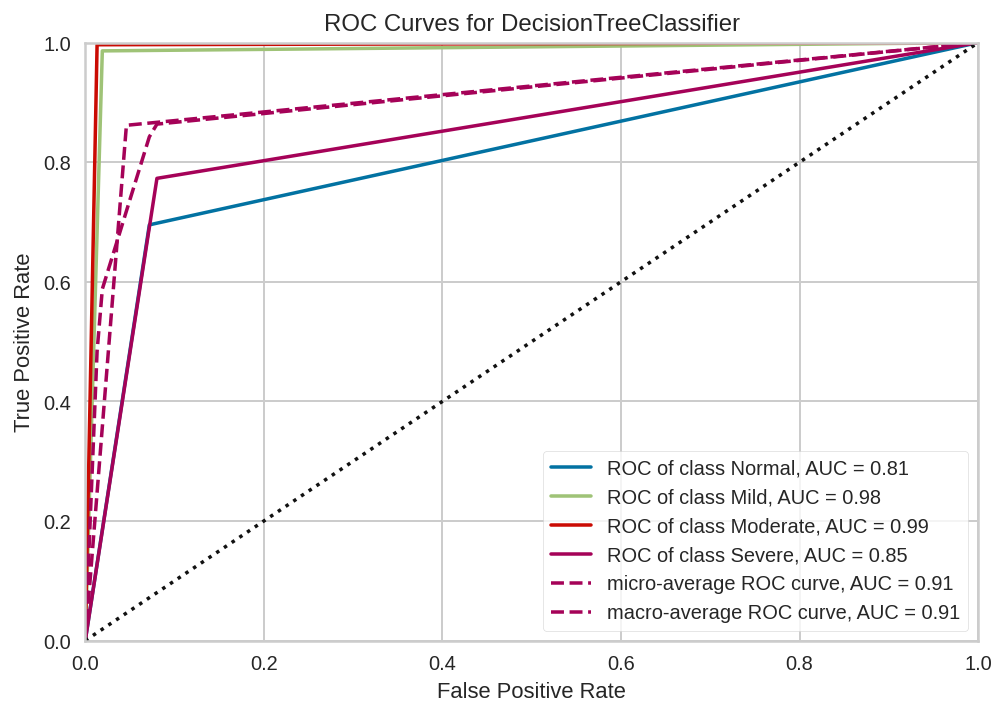

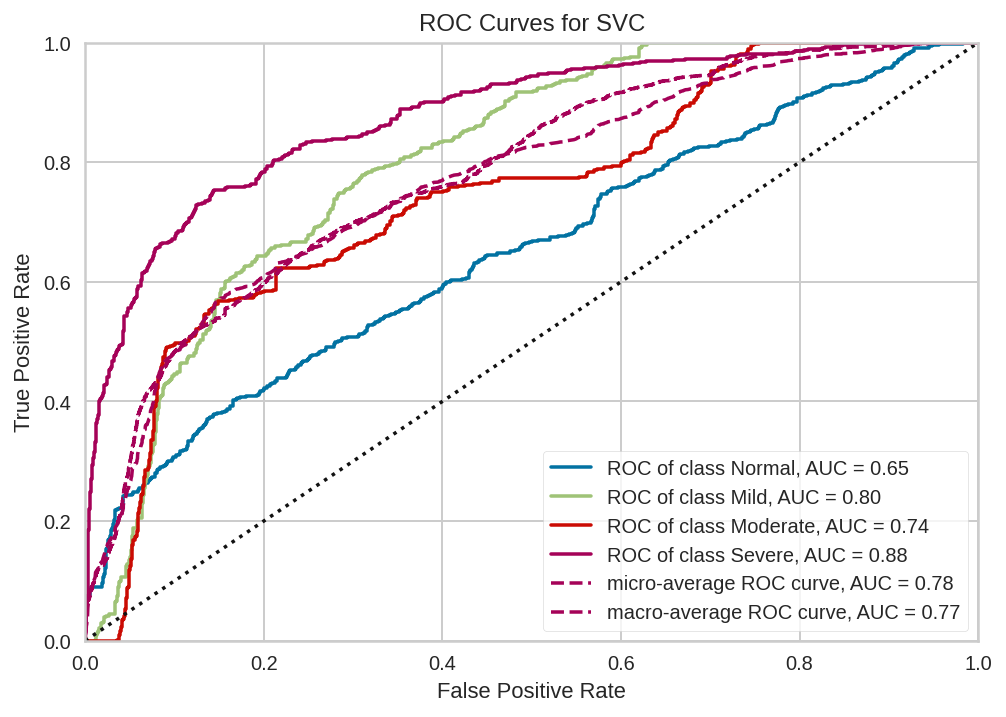

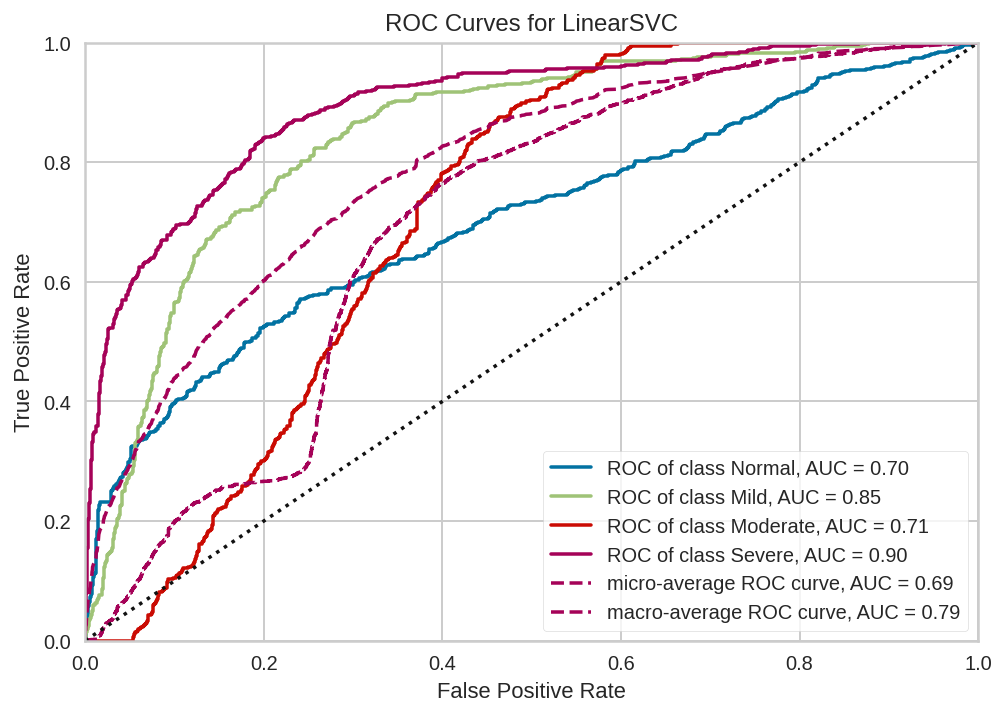

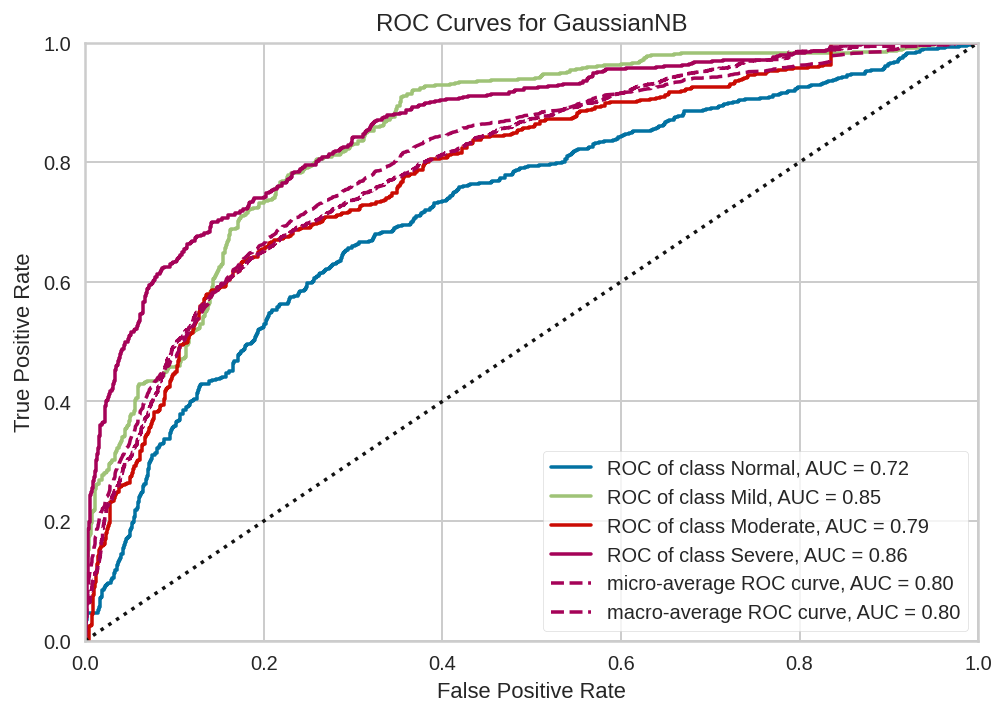

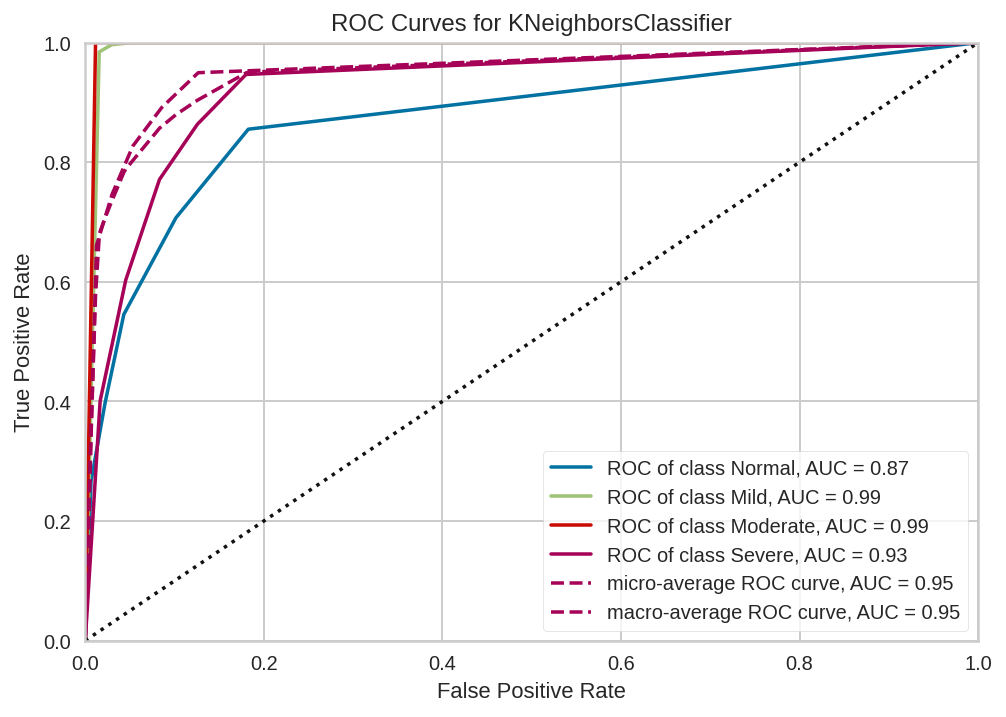

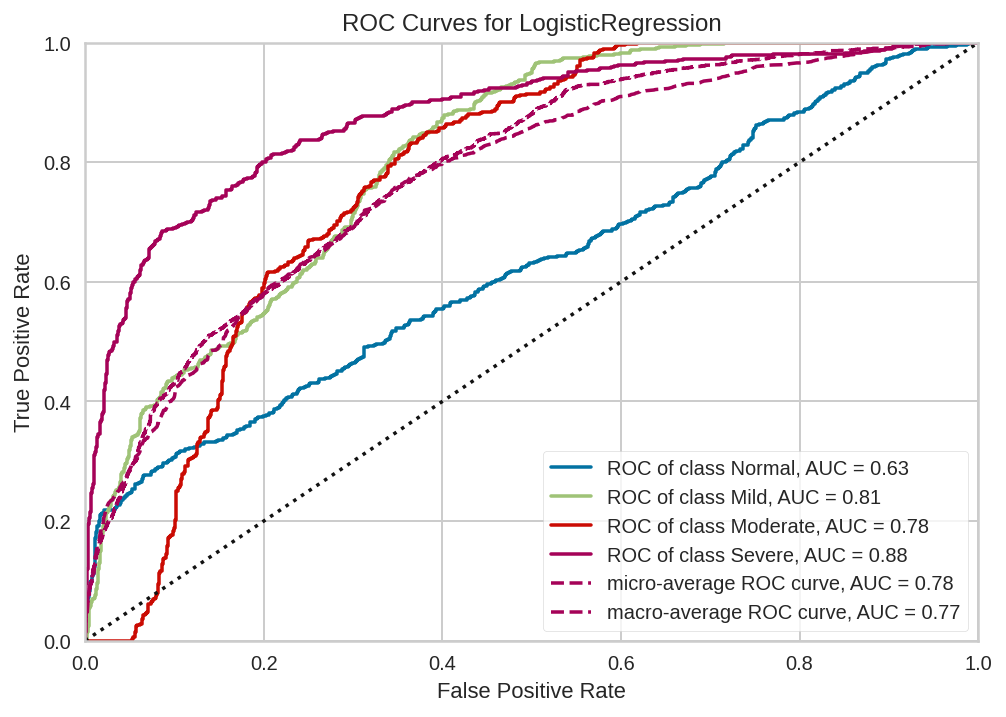

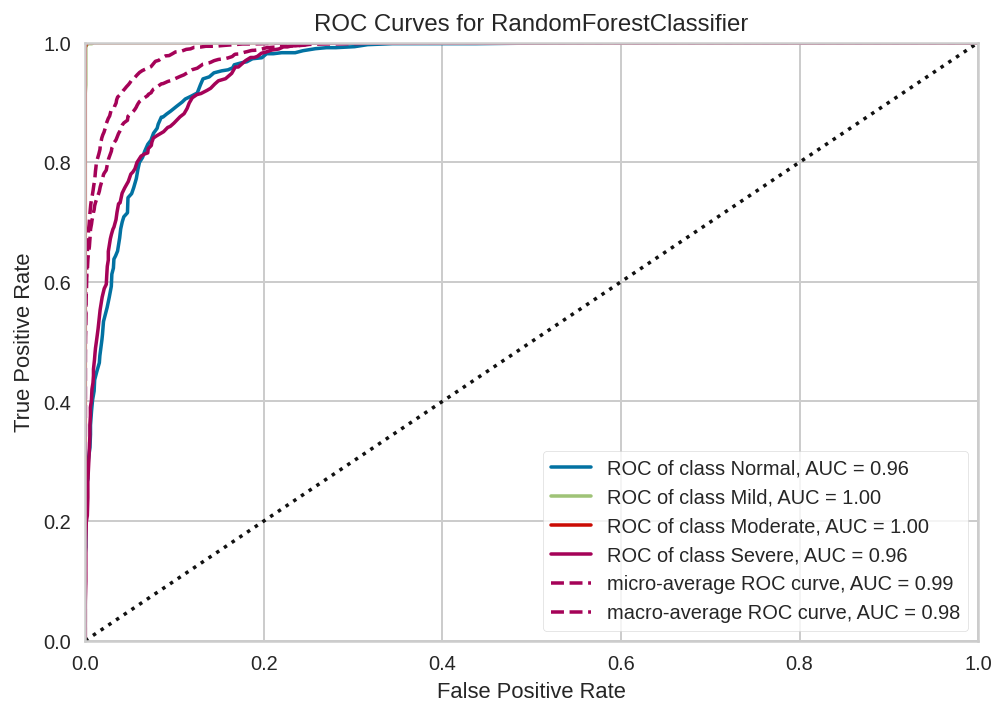

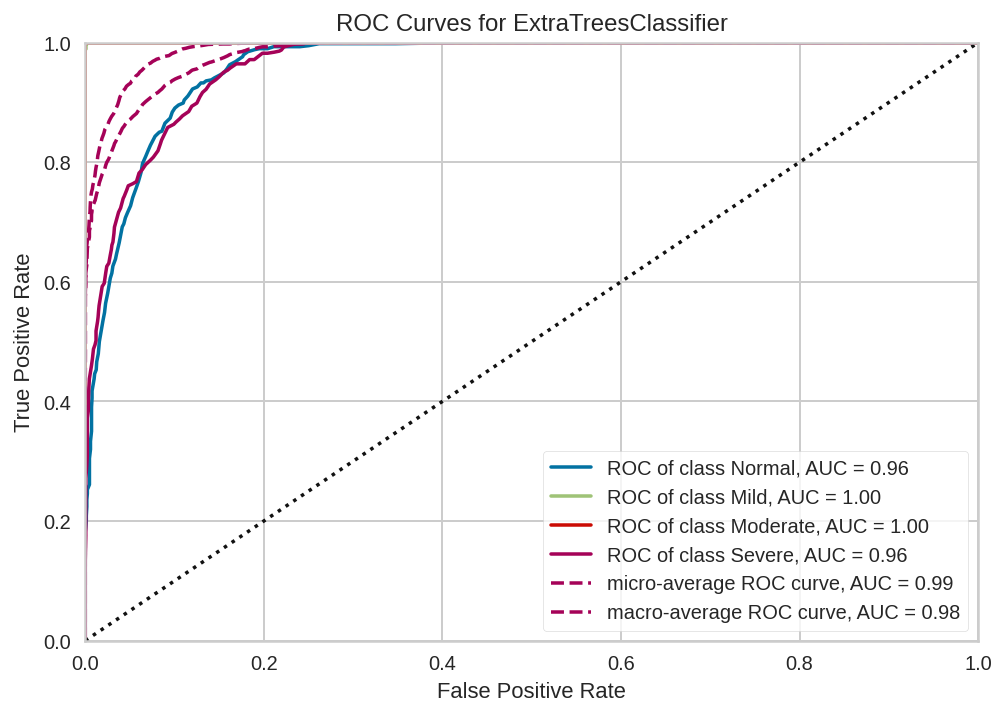

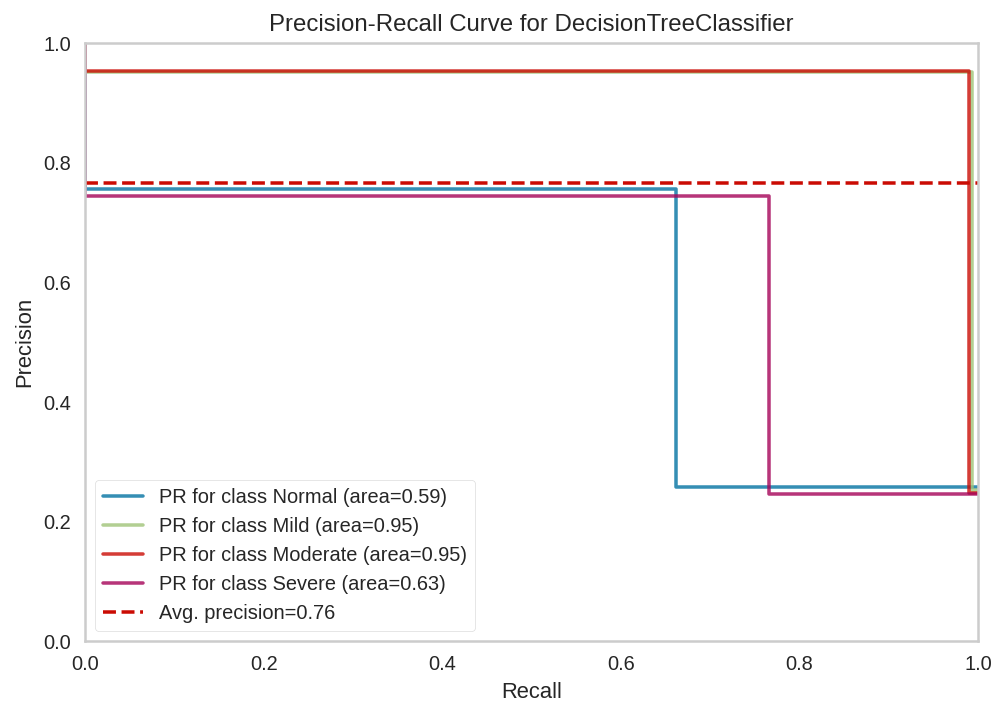

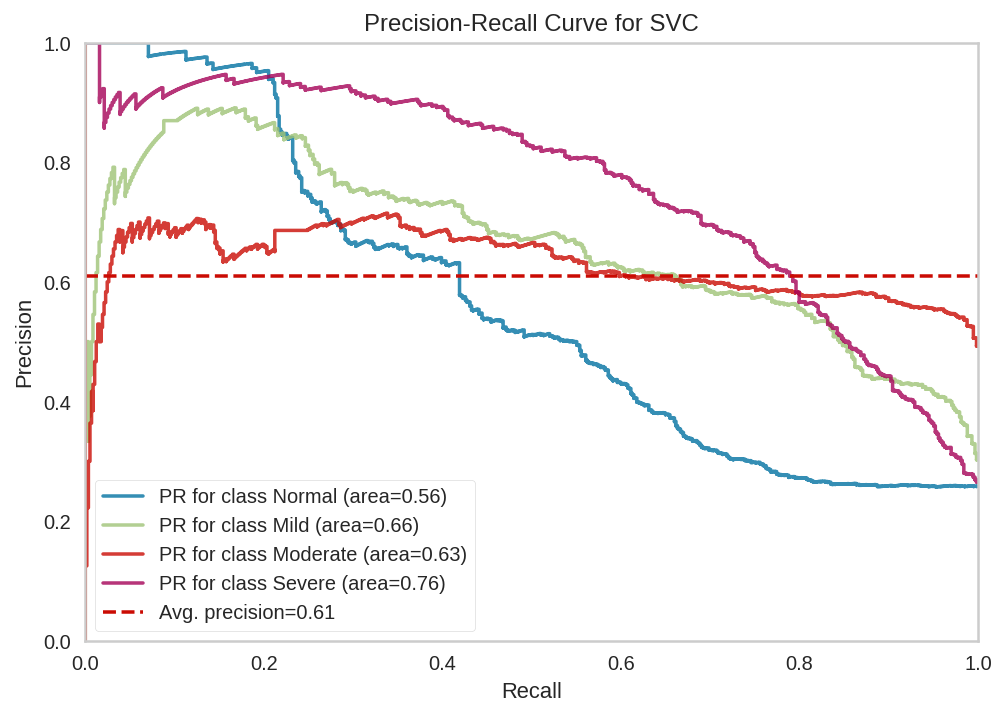

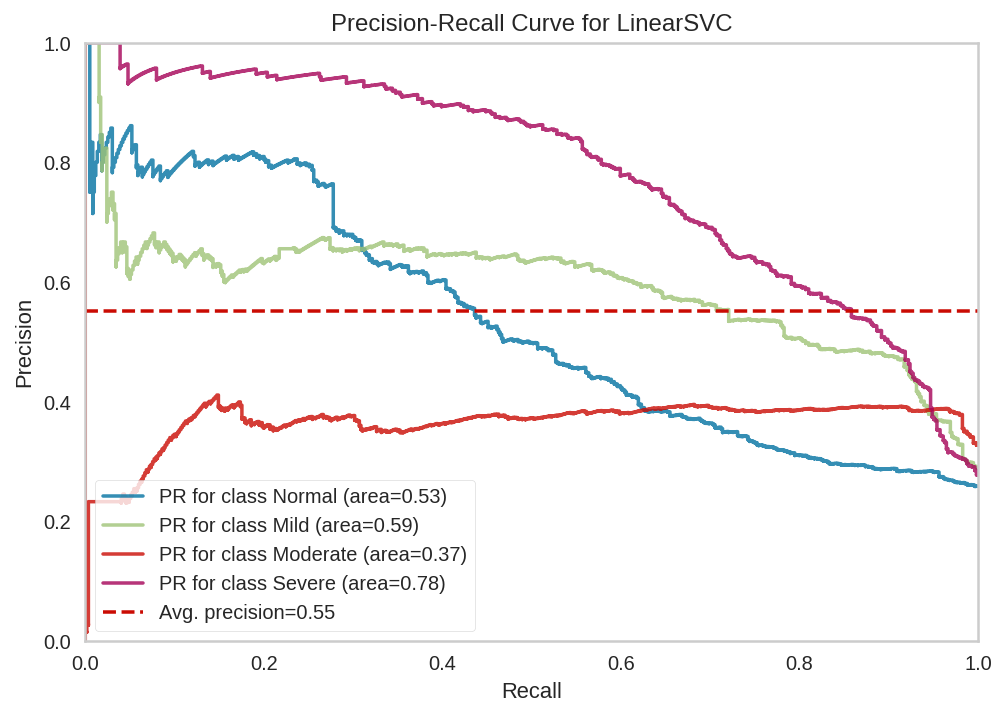

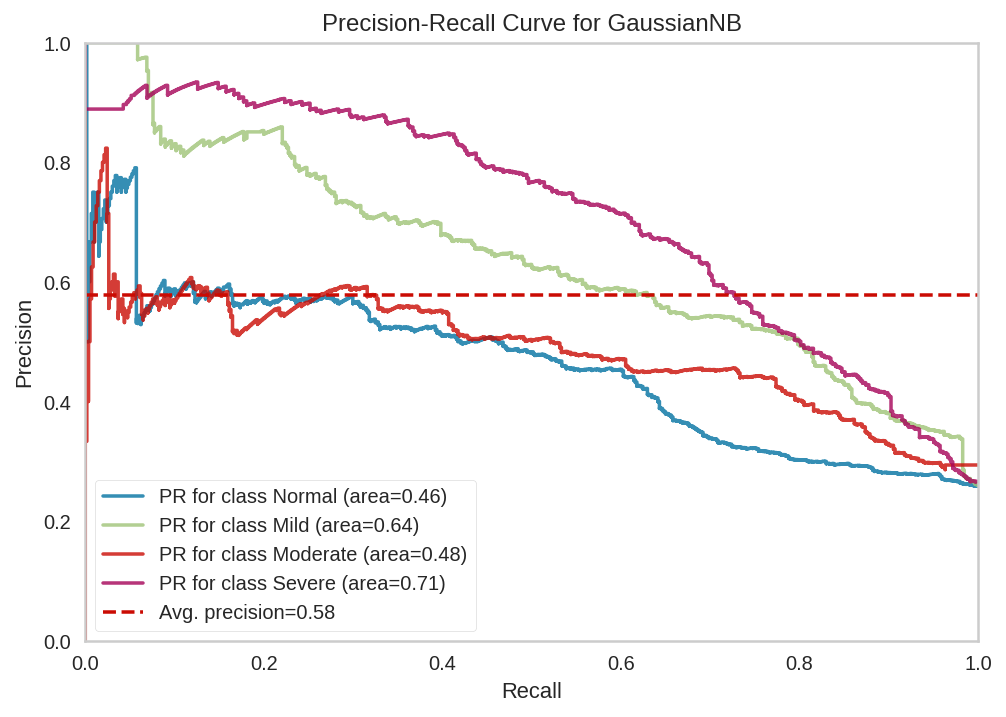

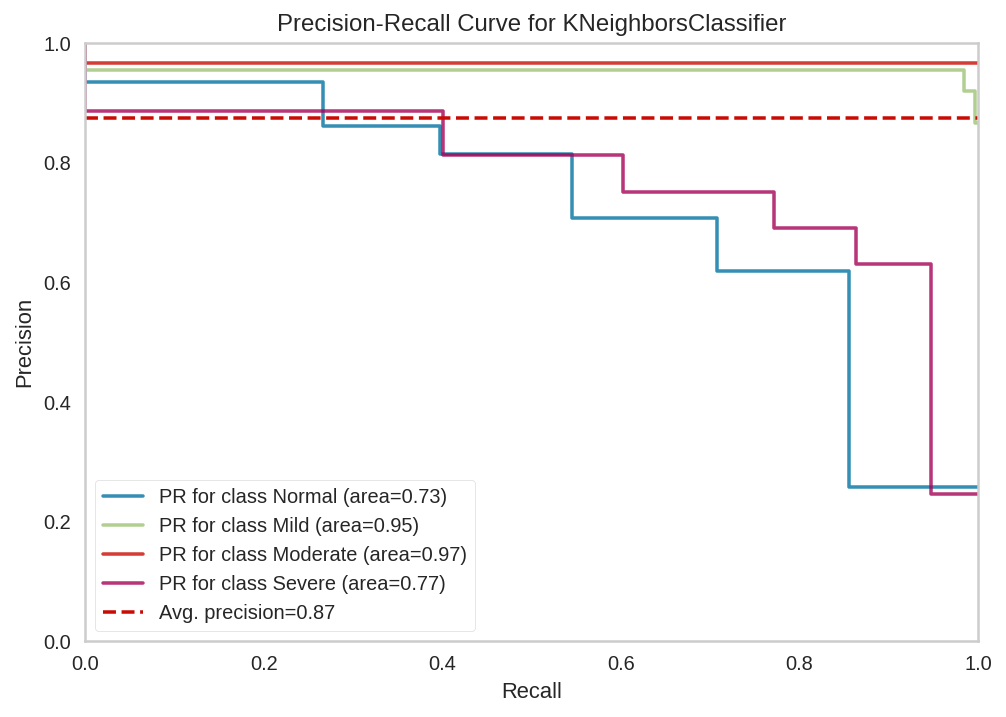

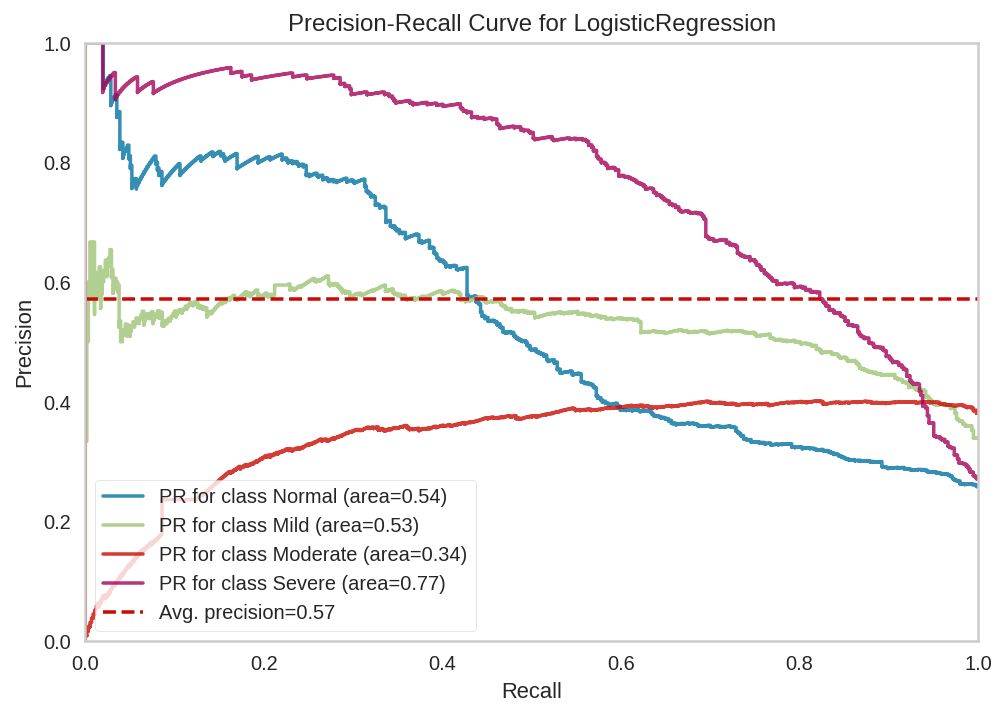

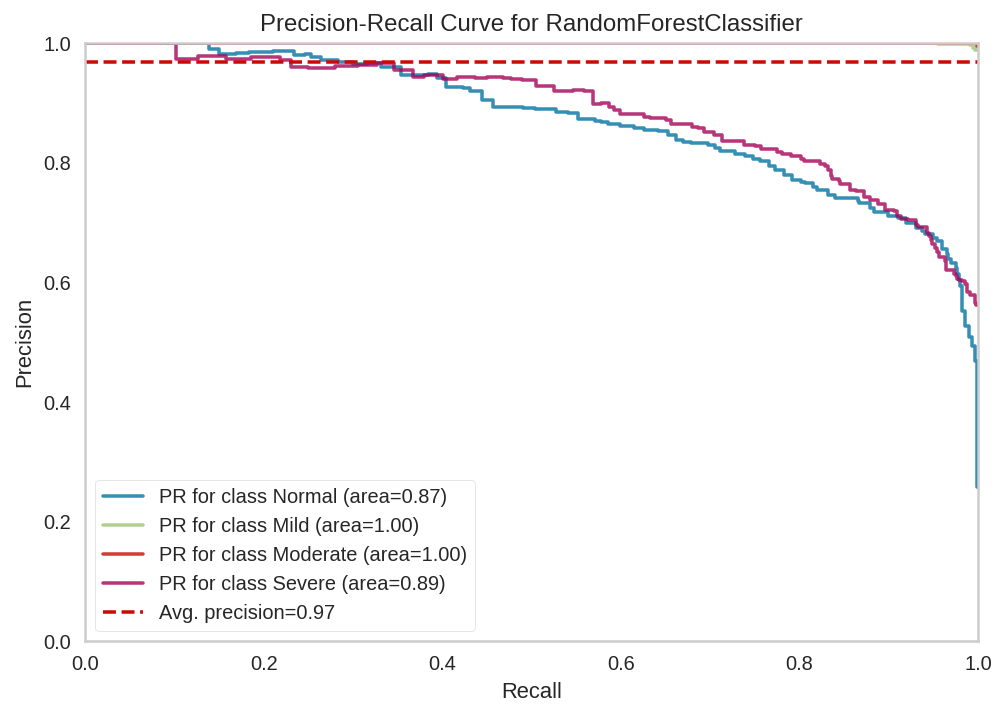

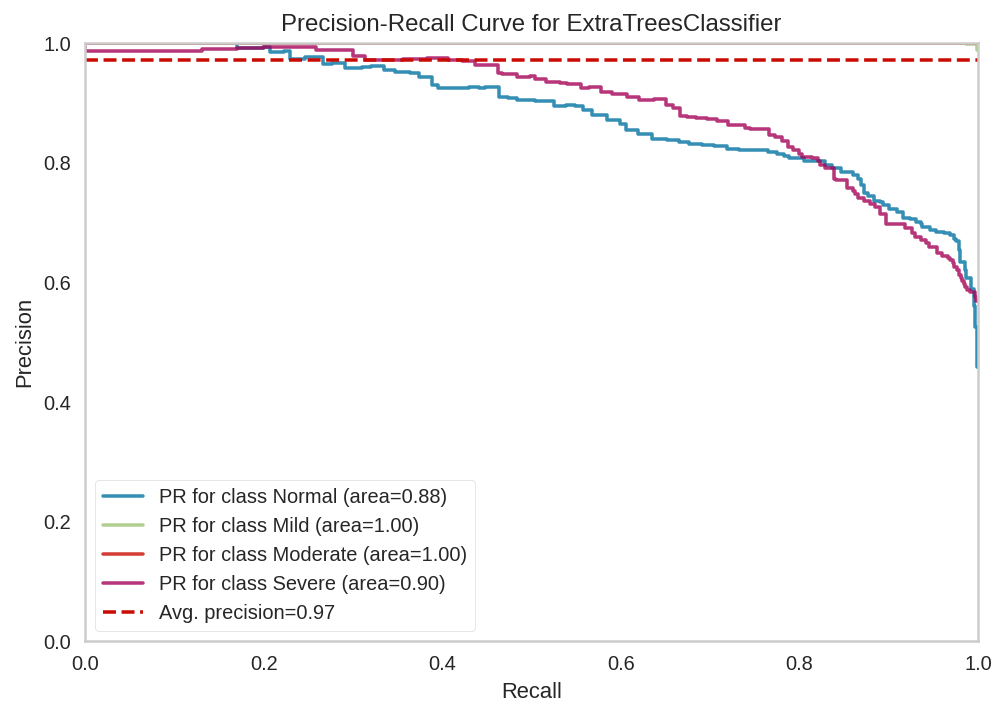

In [25]:
#print visualization :
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [26]:
#print aggregate metrics  
classifier_metrics()

DecisionTreeClassifier(random_state=0)
cohen_kappa_score: 0.816
log_loss: 4.774
zero_one_loss: 0.138
hemming_loss: 0.138
matthews_corrcoef: 0.816

------------------------------------------------
SVC(random_state=0)
cohen_kappa_score: 0.398
log_loss: 0.000
zero_one_loss: 0.452
hemming_loss: 0.452
matthews_corrcoef: 0.406

------------------------------------------------
LinearSVC(random_state=0)
cohen_kappa_score: 0.012
log_loss: 0.000
zero_one_loss: 0.744
hemming_loss: 0.744
matthews_corrcoef: 0.070

------------------------------------------------
GaussianNB()
cohen_kappa_score: 0.432
log_loss: 1.677
zero_one_loss: 0.426
hemming_loss: 0.426
matthews_corrcoef: 0.440

------------------------------------------------
KNeighborsClassifier()
cohen_kappa_score: 0.775
log_loss: 1.949
zero_one_loss: 0.169
hemming_loss: 0.169
matthews_corrcoef: 0.779

------------------------------------------------
LogisticRegression(random_state=0)
cohen_kappa_score: 0.367
log_loss: 1.091
zero_one_loss: 0.4

In [27]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_classifier_BalancedData1_model.pkl', 'wb')

# dump information to that file
pickle.dump(base_model, file)